In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pickle

CLEANSING_PATH = '/content/drive/MyDrive/Spotify_Project/3_Cleansing/spotify_clean_ready.pkl'

# Load the pickle file
with open(CLEANSING_PATH, "rb") as f:
    df = pickle.load(f)

print("Loaded successfully:", df.shape)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Loaded successfully: (32833, 32)


,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,duration_ms,duration_sec,duration_min,release_year,release_month,release_day,release_dow,release_dow_name,mode_label,instrumentalness_log
0,6f807x0ima9a1j3VPbc7VN,i dont care with justin bieber loud luxury remix,ed sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,i dont care with justin bieber loud luxury remix,2019-06-14,pop remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,194754.0,194.754,3.245900,2019,6,14,4.0,Friday,Major (1),0.000000
1,0r7CVbZTWZgbTCYdfa2P31,memories dillon francis remix,maroon 5,67,63rPSO264uRjW1X5E6cWv6,memories dillon francis remix,2019-12-13,pop remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,162600.0,162.600,2.710000,2019,12,13,4.0,Friday,Major (1),0.004201
2,1z1Hg7Vb0AhHDiEmnDE79l,all the time don diablo remix,zara larsson,70,1HoSmj2eLcsrR0vE9gThr4,all the time don diablo remix,2019-07-05,pop remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,176616.0,176.616,2.943600,2019,7,5,4.0,Friday,Minor (0),0.000023
3,75FpbthrwQmzHlBJLuGdC7,call you mine keanu silva remix,the chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,call you mine the remixes,2019-07-19,pop remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,169093.0,169.093,2.818217,2019,7,19,4.0,Friday,Major (1),0.000009
4,1e8PAfcKUYoKkxPhrHqw4x,someone you loved future humans remix,lewis capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,someone you loved future humans remix,2019-03-05,pop remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,189052.0,189.052,3.150867,2019,3,5,1.0,Tuesday,Major (1),0.000000


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   track_id                  32833 non-null  object  
 1   track_name                32828 non-null  string  
 2   track_artist              32828 non-null  string  
 3   track_popularity          32833 non-null  int64   
 4   track_album_id            32833 non-null  object  
 5   track_album_name          32828 non-null  string  
 6   track_album_release_date  32833 non-null  object  
 7   playlist_name             32833 non-null  string  
 8   playlist_id               32833 non-null  object  
 9   playlist_genre            32833 non-null  category
 10  playlist_subgenre         32833 non-null  category
 11  danceability              32833 non-null  float64 
 12  energy                    32833 non-null  float64 
 13  key                       32833 non-null  cate

In [ ]:
# Weekend flag
df['is_weekend'] = df['release_dow_name'].isin(['Saturday', 'Sunday']).astype('int')

# Decade grouping
df['release_decade'] = (df['release_year'] // 10 * 10).astype('Int64')

# Pre-Spotify indicator (for < 2008)
df['is_pre_spotify'] = (df['release_year'] < 2008).astype('int')

New features were created based on the release date of each track.
Features Created:
is_weekend - indicator showing whether the song was released on a weekend (Saturday or Sunday).
release_decade - decade grouping of the release year (e.g., 1970, 1980, 1990...).
is_pre_spotify -flag for songs released before 2008, representing the pre-Spotify era.

In [ ]:
# How many unique songs per artist
artist_song_count = df.groupby("track_artist")["track_id"].nunique()
df["artist_song_count"] = df["track_artist"].map(artist_song_count)

# How many unique albums per artist
artist_album_count = df.groupby("track_artist")["track_album_id"].nunique()
df["artist_album_count"] = df["track_artist"].map(artist_album_count)

# How many unique playlists each artist appears in
artist_playlist_count = df.groupby("track_artist")["playlist_id"].nunique()
df["artist_playlist_count"] = df["track_artist"].map(artist_playlist_count)

# How many songs in each album
album_song_count = df.groupby("track_album_id")["track_id"].nunique()
df["album_song_count"] = df["track_album_id"].map(album_song_count)

# How many playlists each song appears in
song_playlist_count = df.groupby("track_id")["playlist_id"].nunique()
df["song_playlist_count"] = df["track_id"].map(song_playlist_count)

# How many albums each song belongs to
song_album_count = df.groupby("track_id")["track_album_id"].nunique()
df["song_album_count"] = df["track_id"].map(song_album_count)

print(df[[
    "track_artist","track_album_name","playlist_name",
    "artist_song_count","artist_album_count","artist_playlist_count",
    "album_song_count","song_playlist_count","song_album_count"
]].head(5))


       track_artist                                  track_album_name  \
0        ed sheeran  i dont care with justin bieber loud luxury remix   
1          maroon 5                     memories dillon francis remix   
2      zara larsson                     all the time don diablo remix   
3  the chainsmokers                         call you mine the remixes   
4     lewis capaldi             someone you loved future humans remix   

  playlist_name  artist_song_count  artist_album_count  artist_playlist_count  \
0     pop remix               34.0                27.0                   37.0   
1     pop remix               44.0                33.0                   31.0   
2     pop remix               16.0                14.0                   20.0   
3     pop remix               66.0                51.0                   53.0   
4     pop remix                9.0                 7.0                   11.0   

   album_song_count  song_playlist_count  song_album_count  
0            

In [ ]:
# =How many unique songs per playlist
playlist_song_count = df.groupby("playlist_id")["track_id"].nunique()
df["playlist_song_count"] = df["playlist_id"].map(playlist_song_count)

# How many unique artists per playlist
playlist_artist_count = df.groupby("playlist_id")["track_artist"].nunique()
df["playlist_artist_count"] = df["playlist_id"].map(playlist_artist_count)

# How many unique albums per playlist
playlist_album_count = df.groupby("playlist_id")["track_album_id"].nunique()
df["playlist_album_count"] = df["playlist_id"].map(playlist_album_count)

print("Playlist-level features created:",
      ["playlist_song_count","playlist_artist_count","playlist_album_count"])

Playlist-level features created: ['playlist_song_count', 'playlist_artist_count', 'playlist_album_count']


In [ ]:
df[[
    "artist_song_count","artist_album_count","artist_playlist_count",
    "album_song_count","song_playlist_count","song_album_count",
    "playlist_song_count","playlist_artist_count","playlist_album_count"
]].dtypes

,0
artist_song_count,float64
artist_album_count,float64
artist_playlist_count,float64
album_song_count,int64
song_playlist_count,int64
song_album_count,int64
playlist_song_count,int64
playlist_artist_count,int64
playlist_album_count,int64


Creating text features: length and word count for song, album and playlist names

In [ ]:
text_cols= ["track_name", "track_album_name", "playlist_name"]

for col in text_cols:
    # Number of characters
    df[f"{col}_length"] = df[col].astype(str).str.len()

    # Number of words
    df[f"{col}_word_count"] = df[col].astype(str).str.split().apply(len)

print("Text length & word count features created.")
df[[f"{c}_length" for c in text_cols] + [f"{c}_word_count" for c in text_cols]].head(3)

Text length & word count features created.


,track_name_length,track_album_name_length,playlist_name_length,track_name_word_count,track_album_name_word_count,playlist_name_word_count
0,48,48,9,9,9,2
1,29,29,9,4,4,2
2,29,29,9,6,6,2


Extraction of the most frequent words appearing in track_name (song titles), track_album_name (album titles), playlist_name (playlist titles)
This helps to see patterns like:
“love” appears in many songs, “remix” or “live” may appear often.

In [ ]:
# Find the 15 most frequent words in song, album, and playlist names

from collections import Counter
import re
import pandas as pd

def get_top_words(series, top_n=15):
    # Join all text into one big string
    text = " ".join(series.dropna().astype(str)).lower()

    # Keep only letters and spaces
    text = re.sub(r"[^a-z\s]", " ", text)

    # Split into words and count
    words = text.split()
    counts = Counter(words)

    # Return most common words
    return pd.DataFrame(counts.most_common(top_n), columns=["word", "count"])

# Top words for each text field
top_words_track = get_top_words(df["track_name"])
top_words_album = get_top_words(df["track_album_name"])
top_words_playlist = get_top_words(df["playlist_name"])

print("Top 15 words in song titles:")
display(top_words_track)

print("\nTop 15 words in album titles:")
display(top_words_album)

print("\nTop 15 words in playlist titles:")
display(top_words_playlist)

Top 15 words in song titles:


,word,count
0,feat,2804
1,the,2681
2,remix,2110
3,you,1888
4,me,1632
5,i,1172
6,love,1136
7,a,937
8,to,845
9,my,837



Top 15 words in album titles:


,word,count
0,the,4567
1,of,1583
2,feat,1398
3,remix,1119
4,you,1067
5,me,934
6,a,921
7,deluxe,916
8,love,796
9,to,789



Top 15 words in playlist titles:


,word,count
0,s,5296
1,pop,5289
2,rock,4706
3,house,3501
4,hits,2467
5,hip,2448
6,rap,2274
7,hop,2195
8,edm,2094
9,dance,1971


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 50 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   track_id                     32833 non-null  object  
 1   track_name                   32828 non-null  string  
 2   track_artist                 32828 non-null  string  
 3   track_popularity             32833 non-null  int64   
 4   track_album_id               32833 non-null  object  
 5   track_album_name             32828 non-null  string  
 6   track_album_release_date     32833 non-null  object  
 7   playlist_name                32833 non-null  string  
 8   playlist_id                  32833 non-null  object  
 9   playlist_genre               32833 non-null  category
 10  playlist_subgenre            32833 non-null  category
 11  danceability                 32833 non-null  float64 
 12  energy                       32833 non-null  float64 
 13  k

In [ ]:
cols_to_fill = ['artist_song_count', 'artist_album_count', 'artist_playlist_count']

for col in cols_to_fill:
    median_value = df[col].median()
    df[col] = df[col].fillna(median_value).astype('int64')

print("Missing values filled with median for:", cols_to_fill)
print(df[cols_to_fill].isna().sum())

Missing values filled with median for: ['artist_song_count', 'artist_album_count', 'artist_playlist_count']
artist_song_count        0
artist_album_count       0
artist_playlist_count    0
dtype: int64


The dataset now includes 50 features.

#EDA of New Features

In [ ]:
df['track_popularity'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
track_popularity,32833.0,42.477081,24.984074,0.0,24.0,45.0,62.0,100.0


##Correlation and Relationship Analysis with Target

In [ ]:
numeric_cols = df.select_dtypes(include=['float64','int64','Int64']).columns
corr_spearman = df[numeric_cols].corr()['track_popularity'].sort_values(ascending=False)
print(corr_spearman)

track_popularity               1.000000
song_playlist_count            0.434944
artist_playlist_count          0.197188
acousticness                   0.097400
release_month                  0.093032
artist_album_count             0.092820
release_day                    0.066186
danceability                   0.064748
artist_song_count              0.062144
release_year                   0.060744
loudness                       0.059493
valence                        0.033231
playlist_artist_count          0.032828
release_decade                 0.023361
speechiness                    0.008721
track_name_word_count          0.003381
playlist_album_count          -0.000336
track_name_length             -0.004979
tempo                         -0.005581
playlist_name_word_count      -0.015181
liveness                      -0.027650
track_album_name_word_count   -0.031591
track_album_name_length       -0.041122
playlist_name_length          -0.045441
is_weekend                    -0.050213



Some variables (e.g., is_weekend, is_pre_spotify) are binary and included in the correlation table only because they are stored as numeric (0/1).
However, they are categorical in nature, so their correlation with track_popularity should be interpreted as the difference between two groups rather than a continuous linear relationship.

Similarly, temporal variables such as release_year, release_month, or release_decade are ordinal rather than truly continuous - they are represented numerically only to preserve chronological order.
Therefore, Spearman correlation or group-based comparisons (e.g., boxplots or ANOVA) provide a more meaningful interpretation for these features.

Spearman correlation was used for assessing relationships with track_popularity, as most numerical variables exhibit non-normal and skewed distributions.

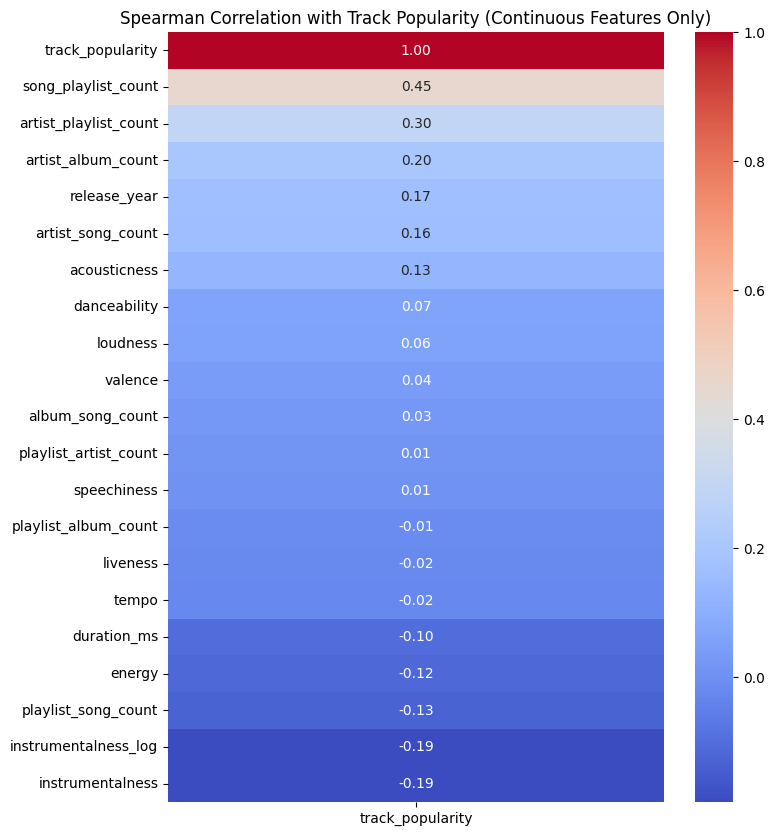

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Numeric continuous variables only
numeric_continuous = [
    'danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
    'instrumentalness', 'instrumentalness_log', 'liveness', 'valence',
    'tempo', 'duration_ms', 'playlist_song_count', 'playlist_artist_count',
    'playlist_album_count', 'artist_song_count', 'artist_album_count',
    'artist_playlist_count', 'album_song_count', 'song_playlist_count','release_year'
]

plt.figure(figsize=(8,10))
sns.heatmap(
    df[numeric_continuous + ['track_popularity']].corr(method='spearman')[['track_popularity']]
        .sort_values(by='track_popularity', ascending=False),
    annot=True, cmap='coolwarm', fmt='.2f'
)
plt.title("Spearman Correlation with Track Popularity (Continuous Features Only)")
plt.show()


Spearman correlations were calculated between all numerical features and the target variable track_popularity.
The strongest positive association was found for song_playlist_count (r = 0.45), indicating that songs appearing in multiple playlists tend to achieve higher popularity.
Moderate positive correlations were observed for artist_playlist_count (r = 0.30), artist_album_count (r = 0.20), and release_year (r = 0.17), suggesting that exposure and recency contribute to popularity.

Weak positive correlations (< 0.1) were found for musical attributes such as acousticness, danceability, and loudness, while negative correlations were observed for instrumentalness (r = -0.19), playlist_song_count (r= -0.13), energy (-0.12) implying that instrumental, longer, and high-energy tracks tend to be less popular.
Overall, no single feature exhibited a very strong monotonic relationship with popularity, reinforcing the importance of a multivariate modeling approach in later stages.

#Multicollinearity Check

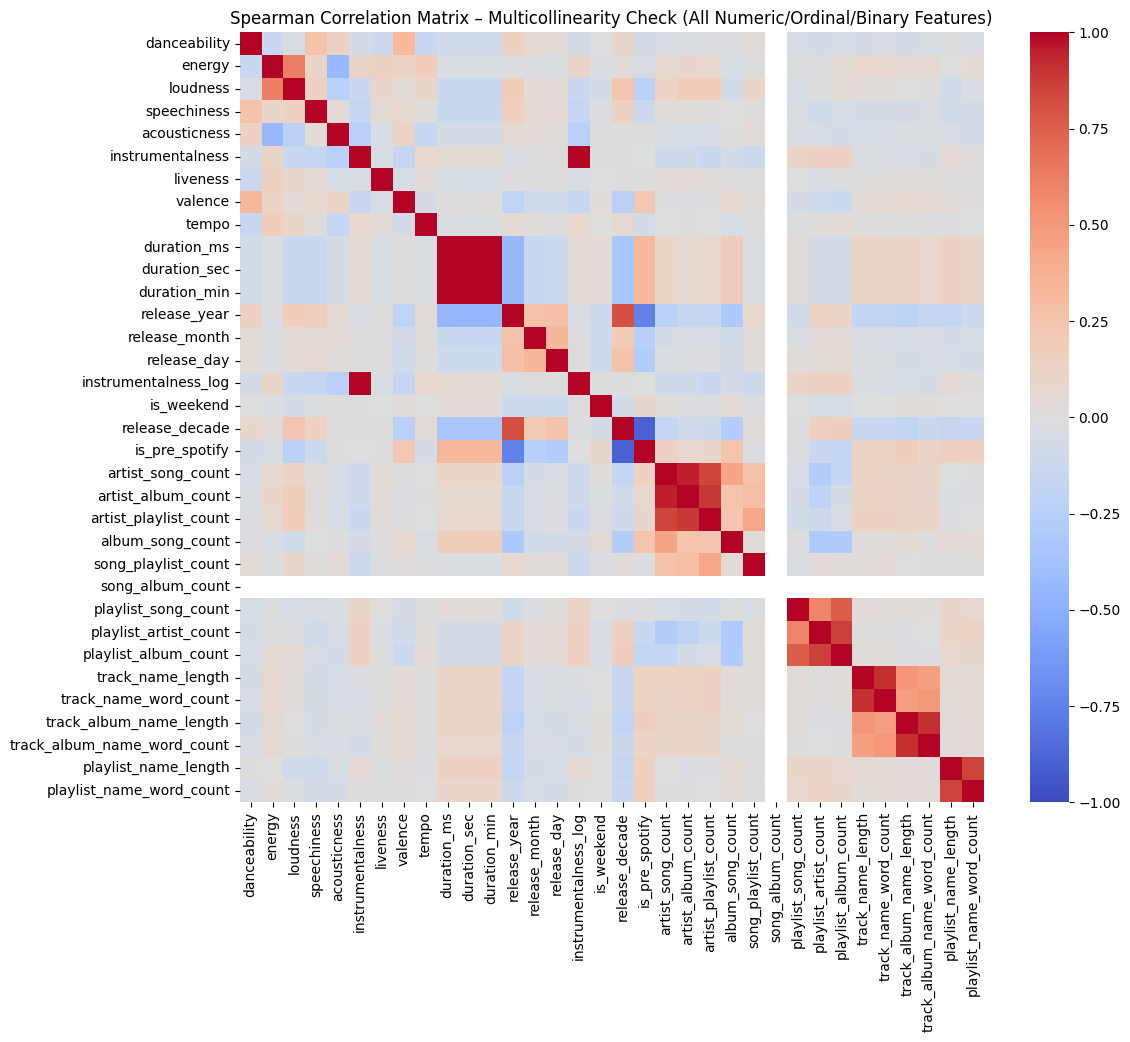

,Feature_1,Feature_2,Correlation
159,instrumentalness,instrumentalness_log,1.000000
252,duration_ms,duration_sec,1.000000
253,duration_ms,duration_min,1.000000
275,duration_sec,duration_min,1.000000
437,artist_song_count,artist_album_count,0.948151
513,track_name_length,track_name_word_count,0.912795
522,track_album_name_length,track_album_name_word_count,0.906575
450,artist_album_count,artist_playlist_count,0.889304
500,playlist_artist_count,playlist_album_count,0.865993
438,artist_song_count,artist_playlist_count,0.848124


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Select all numeric-like features (including ordinal, binary, and continuous)
num_like_features = df.select_dtypes(include=["int64","float64","Int64","float32"]).drop(
    columns=["track_popularity"], errors="ignore"
)

# Compute Spearman correlation (handles ordinal & binary well)
corr_matrix = num_like_features.corr(method="spearman")

# Visualize
plt.figure(figsize=(12,10))
sns.heatmap(
    corr_matrix,
    cmap="coolwarm",
    center=0,
    vmin=-1, vmax=1,
    annot=False
)
plt.title("Spearman Correlation Matrix – Multicollinearity Check (All Numeric/Ordinal/Binary Features)")
plt.show()

# print pairs with very high correlation
high_corr = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    .stack()
    .reset_index()
    .rename(columns={"level_0": "Feature_1", "level_1": "Feature_2", 0: "Correlation"})
)
# print("Highly correlated pairs (|r| > 0.8):")
display(high_corr[high_corr["Correlation"].abs() > 0.8].sort_values(by="Correlation", ascending=False))

In [ ]:
import pandas as pd

# 1) Build a safe drop list based on the multicollinearity findings
to_drop = []

# a) Duration variants: keep duration_ms (we'll scale later), drop the rest
for col in ["duration_sec", "duration_min"]:
    if col in df.columns:
        to_drop.append(col)

# b) Instrumentalness: keep the log, drop the raw if both exist
if "instrumentalness" in df.columns and "instrumentalness_log" in df.columns:
    to_drop.append("instrumentalness")

# c) Text pairs: keep *_word_count, drop *_length
for base in ["track_name", "track_album_name", "playlist_name"]:
    len_col = f"{base}_length"
    wc_col  = f"{base}_word_count"
    if len_col in df.columns and wc_col in df.columns:
        to_drop.append(len_col)

# d) Temporal redundancy: drop release_decade (keep release_year and is_pre_spotify)
if "release_decade" in df.columns:
    to_drop.append("release_decade")

# e) Remove zero-variance / degenerate features (e.g., song_album_count if constant)
if "song_album_count" in df.columns:
    nunq = df["song_album_count"].nunique(dropna=False)
    if nunq <= 1:  # constant or all-NA
        to_drop.append("song_album_count")

# 2) Deduplicate & drop
to_drop = sorted(set(to_drop))
shape_before = df.shape
df = df.drop(columns=to_drop, errors="ignore").copy()
shape_after = df.shape

print("Dropped redundant features:", to_drop)
print(f"Shape before: {shape_before}  ->  after: {shape_after}")

Dropped redundant features: ['duration_min', 'duration_sec', 'instrumentalness', 'playlist_name_length', 'release_decade', 'song_album_count', 'track_album_name_length', 'track_name_length']
Shape before: (32833, 50)  ->  after: (32833, 42)


Dropped directly (redundant / identical):
duration_sec, duration_min - duplicated scales of the same metric
instrumentalness - kept only its log-transformed version
*_Lenght - dropped, kept *_word_count instead
release_decade - redundant with release_year and is_pre_spotify
song_album_count - removed (constant / no variance)
Kept for Lasso to decide (moderate correlations but distinct meaning):
All artist_* and playlist_* count features
Time-based variables (release_year, release_month, release_dow, etc.)
Audio features (danceability, energy, acousticness, etc.)
Binary flags (is_weekend, is_pre_spotify)

Mann-Whitney

In [ ]:
from scipy import stats
import numpy as np

target = "track_popularity"

# find all binary (0/1) columns automatically
binary_cols = [col for col in df.columns
               if df[col].dropna().isin([0, 1]).all() and col != target]

print("Binary variables:", binary_cols)
print("-" * 50)

# run Mann–Whitney for each binary feature
for col in binary_cols:
    group1 = df.loc[df[col] == 1, target].dropna()
    group0 = df.loc[df[col] == 0, target].dropna()
    if len(group1) < 5 or len(group0) < 5:
        continue  # skip if too few values

    u_stat, p_val = stats.mannwhitneyu(group1, group0, alternative="two-sided")
    print(f"{col}: U={u_stat:.1f}, p={p_val:.4g}, "
          f"median(1)={np.median(group1):.1f}, median(0)={np.median(group0):.1f}")

    if p_val < 0.05:
        print(" → Significant difference in popularity.\n")
    else:
        print(" → No significant difference.\n")


Binary variables: ['mode', 'is_weekend', 'is_pre_spotify']
--------------------------------------------------
mode: U=134367264.5, p=0.02235, median(1)=46.0, median(0)=45.0
 → Significant difference in popularity.

is_weekend: U=30429332.0, p=3.612e-17, median(1)=40.0, median(0)=46.0
 → Significant difference in popularity.

is_pre_spotify: U=91890665.5, p=8.645e-13, median(1)=45.0, median(0)=45.0
 → Significant difference in popularity.



Anova

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
from pandas.api.types import (
    is_categorical_dtype, is_object_dtype, is_string_dtype,
    is_integer_dtype, is_bool_dtype, is_datetime64_any_dtype
)

# Ensure date column is proper datetime (for safe exclusion)
if "track_album_release_date" in df.columns:
    df["track_album_release_date"] = pd.to_datetime(df["track_album_release_date"], errors="coerce")

TARGET = "track_popularity"
MIN_GROUPS = 3
MIN_PER_GROUP = 5

# Quantitative count-like features to exclude from categorical tests
quantitative_exclude = {
    "song_playlist_count", "album_song_count",
    "artist_song_count", "artist_album_count", "artist_playlist_count",
    "playlist_song_count", "playlist_artist_count", "playlist_album_count",
    "track_name_word_count", "track_album_name_word_count", "playlist_name_word_count"
}

# Name markers that indicate date/time columns even if dtype is object
date_name_markers = ("date", "time", "_dt", "_ts")

# Detect categorical-like variables (exclude IDs, dates, binaries, counts)
cat_like = []
for col in df.columns:
    if col == TARGET or col in {"track_id", "track_album_id", "playlist_id"}:
        continue
    s = df[col]

    # skip datetimes or columns whose name suggests date/time
    if is_datetime64_any_dtype(s) or any(tok in col.lower() for tok in date_name_markers):
        continue

    # skip binaries and known quantitative counts
    if is_bool_dtype(s) or col in quantitative_exclude:
        continue

    nunq = s.nunique(dropna=True)

    # true categorical or string/object
    if (is_categorical_dtype(s) or is_object_dtype(s) or is_string_dtype(s)):
        if nunq >= MIN_GROUPS:
            cat_like.append(col)
    # integer with low cardinality (ordinal-like: month/weekday/quarter/key/mode)
    elif is_integer_dtype(s) and (3 <= nunq <= 20):
        cat_like.append(col)

# Kruskal–Wallis for each eligible categorical-like variable
rows = []
for col in cat_like:
    groups = []
    for _, g in df[[col, TARGET]].dropna(subset=[col, TARGET]).groupby(col, observed=False):
        vals = g[TARGET].to_numpy()
        if len(vals) >= MIN_PER_GROUP:
            groups.append(vals)
    if len(groups) < MIN_GROUPS:
        continue
    p_val = stats.kruskal(*groups).pvalue
    rows.append({
        "Variable": col,
        "Levels": len(groups),
        "N": sum(len(g) for g in groups),
        "Test": "Kruskal",
        "p_value": p_val
    })

anova_tbl = pd.DataFrame(rows).sort_values("p_value").reset_index(drop=True)
display(anova_tbl)

/tmp/ipython-input-915446003.py:46: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if (is_categorical_dtype(s) or is_object_dtype(s) or is_string_dtype(s)):


,Variable,Levels,N,Test,p_value
0,track_artist,1446,18715,Kruskal,0.000000e+00
1,track_album_name,970,7435,Kruskal,0.000000e+00
2,playlist_name,422,32830,Kruskal,0.000000e+00
3,playlist_subgenre,24,32833,Kruskal,0.000000e+00
4,playlist_genre,6,32833,Kruskal,5.486340e-242
5,track_name,581,3948,Kruskal,3.443898e-180
6,release_dow_name,7,32833,Kruskal,3.243330e-154
7,release_dow,7,32833,Kruskal,3.243330e-154
8,release_month,12,32833,Kruskal,4.338506e-53
9,key,12,32833,Kruskal,3.460539e-06


All categorical variables tested (including genre, subgenre, artist, album, track name, playlist, release month and day, and musical key) show statistically significant differences in track popularity — indicating that popularity varies meaningfully across the different variable levels

,word,mean_diff,p_value
12,remaster,12.513477,3.822353e-22
5,with,12.389625,5.635926e-35
0,feat,10.346763,1.058652e-106
6,dont,1.765209,1.162621e-01
9,like,-0.200164,9.193243e-01
13,down,-0.408997,7.682062e-01
7,remastered,-1.454394,1.591058e-01
10,your,-2.206005,7.007848e-02
2,love,-2.227732,5.661631e-03
14,this,-3.049820,7.366106e-02


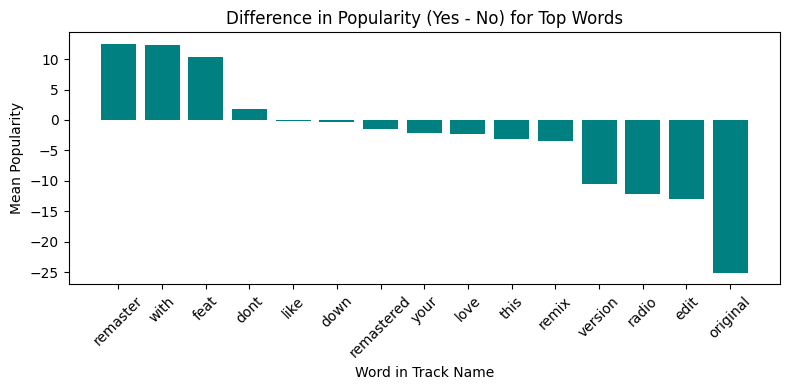

In [ ]:
import pandas as pd
import numpy as np
from collections import Counter
from scipy.stats import mannwhitneyu
import matplotlib.pyplot as plt

# tokenize track names
words = [w for txt in df["track_name"].astype(str).str.lower() for w in txt.split()]
word_counts = Counter(words)

# take top 15 most common words (excluding very short or meaningless ones)
common_words = [w for w, c in word_counts.most_common(50) if len(w) > 3][:15]

# create binary columns for these words
for w in common_words:
    df[f"has_{w}"] = df["track_name"].str.contains(fr"\b{w}\b", case=False, na=False).astype(int)

# compare popularity with Mann–Whitney
results = []
for w in common_words:
    yes = df.loc[df[f"has_{w}"] == 1, "track_popularity"]
    no = df.loc[df[f"has_{w}"] == 0, "track_popularity"]
    if len(yes) > 5 and len(no) > 5:
        stat, p = mannwhitneyu(yes, no, alternative="two-sided")
        diff = yes.mean() - no.mean()
        results.append({"word": w, "mean_diff": diff, "p_value": p})

# results table
result_df = pd.DataFrame(results).sort_values("mean_diff", ascending=False)
display(result_df)

# Step 5: plot
plt.figure(figsize=(8,4))
plt.bar(result_df["word"], result_df["mean_diff"], color="teal")
plt.title("Difference in Popularity (Yes - No) for Top Words")
plt.ylabel("Mean Popularity")
plt.xlabel("Word in Track Name")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Feat, with, remaster - these terms usually indicate collaborations or renewed versions, which tend to attract more listeners and broader exposure.

Words linked to lower popularity:
remix, version, radio, edit, original - these describe alternative or edited versions, which generally receive fewer streams than the main release.

Neutral words (removed from final table):
dont, like, this, your, down - common everyday words with no measurable impact.

In [ ]:
# Create binary features for significant keywords in track titles
significant_keywords = ["feat", "with", "remaster", "remix", "radio", "edit", "original", "version"]

for word in significant_keywords:
    df[f"has_{word}"] = df["track_name"].str.lower().str.contains(fr"\b{word}\b", na=False).astype(int)

print("Created keyword features:", [f"has_{w}" for w in significant_keywords])
df[[f"has_{w}" for w in significant_keywords]].head()

Created keyword features: ['has_feat', 'has_with', 'has_remaster', 'has_remix', 'has_radio', 'has_edit', 'has_original', 'has_version']


,has_feat,has_with,has_remaster,has_remix,has_radio,has_edit,has_original,has_version
0,0,1,0,1,0,0,0,0
1,0,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0,0
3,0,0,0,1,0,0,0,0
4,0,0,0,1,0,0,0,0


In [ ]:
df.to_pickle("/content/drive/MyDrive/Spotify_Project/4_Feature_Engineering/spotify_with_features.pkl")
print("Saved to Drive: spotify_with_features.pkl")

Saved to Drive: spotify_with_features.pkl


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 57 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   track_id                     32833 non-null  object        
 1   track_name                   32828 non-null  string        
 2   track_artist                 32828 non-null  string        
 3   track_popularity             32833 non-null  int64         
 4   track_album_id               32833 non-null  object        
 5   track_album_name             32828 non-null  string        
 6   track_album_release_date     30947 non-null  datetime64[ns]
 7   playlist_name                32833 non-null  string        
 8   playlist_id                  32833 non-null  object        
 9   playlist_genre               32833 non-null  category      
 10  playlist_subgenre            32833 non-null  category      
 11  danceability                 32833 non-nu